# **Mathematical Modelling for Physiology**
------
# *Lecture #6 / Tutorial #2*
## Ordinary Differential Equations (ODEs)
------

## Python stuff

The libraries used:
1. `numpy` - For vector math
2. `matplotlib.pyplot` - For plotting
3. `scipy` - For numerical integration

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Conveniences

In [82]:
# For fancy plot manipulations
from matplotlib.widgets import Slider, Button
%matplotlib widget

# For fancy plot fonts
plt.rcParams.update({
    "text.usetex": False,  # Use LaTeX for text rendering
    "font.family": "sans-serif",  # Use a serif font
    "font.size": 12,  # Adjust font size
})

In [136]:
# Plots 1 line
def Line1Plotter(x, y, figsize, style, xlabel, ylabel, title):
    plt.close('all')
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, style)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.6)
    # plt.tight_layout()

# Plots N lines
def LineNPlotter(data, figsize, styles, labels, xlabel, ylabel, title):
    if len(
        set(list(map(len, [data, styles, labels])))
        ) == 1:
        N_data = len(data)
    else:
        raise ValueError("The plot variables are not equal lengths.")
    plt.close('all')
    fig, ax = plt.subplots(figsize=figsize)
    for _ in range(N_data):
        ax.plot(data[_][0], data[_][1], styles[_], label=labels[_])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    # plt.tight_layout()

In [176]:
# Plots 1 interactive line
def InteractivePlotter(
    t, xfunc,
    params, paramlims, paramdels, paramlabels,
    color, axlims, figsize, xlabel, ylabel, title
    ):
    plt.close('all')
    fig, ax = plt.subplots(figsize=figsize)
    if len(
        set(list(map(len, [params, paramlims, paramdels, paramlabels])))
        ) == 1:
        N_params = len(params)
    else:
        raise ValueError("The parameter variables are not equal lengths.")
    plt.subplots_adjust(bottom=0.30)
    l, = plt.plot(t, xfunc(t, *params), color=color)
    plt.axis(axlims)
    axeslist = []
    sliders = []
    bottoms = np.arange(0.1, 0.2, 0.1/N_params)
    for _ in range(N_params):
        axeslist.append(plt.axes([0.25, bottoms[_], 0.65, 0.01]))
        sliders.append(
            Slider(
                axeslist[_], paramlabels[_],
                paramlims[_][0], paramlims[_][1],
                valinit=params[_], valstep=paramdels[_])
        )
    def update(val):
        params_ = []
        for _ in range(N_params):
            params_.append(sliders[_].val)
        l.set_ydata(xfunc(t, *params_))
        fig.canvas.draw_idle()

    for _ in range(N_params):
        sliders[_].on_changed(update)

    resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', color='Grey', hovercolor='0.7')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.6)
    def reset(event):
        for _ in range(N_params):
            sliders[_].reset()
    button.on_clicked(reset)
    plt.show()

## (Linear) First-Order ODE

The general form is given by:
$$ \frac{\mathrm{d}x}{\mathrm{d}t} + q(t)\cdot x = p(t) $$

The following are the cases we will be studying:

1. $p(t) = 0$ - This corresponds to the homogenous linear ODE
2. $p(t) = C$ where $C$ is a constant
3. $p(t) = m t$ where $m$ is a constant
4. $p(t) = A \sin(\omega t)$ where $A$ and $\omega$ are constant

For all cases we will be considering $q(t) = k$ for some constant $k$.

In [268]:
# q and p are callable functions
def FirstODEGeneralEqn(x, t, q, p):
    return -q(t) * x + p(t)

def Constant(t, C):
    return C

def Homogenous(t):
    return Constant(t, 0)

def Linear(t, m):
    return m*t

def Sinusoid(t, A, omega):
    return A*np.sin(omega*t)

### Case 1: Homogeneous

The equation is given by
$$ \frac{\mathrm{d}x}{\mathrm{d}t} + k\cdot x = 0 $$

The analytical solution for this given the initial condition $x(0) = x_0$ is:
$$ x(t) = x_0 \exp(-kt) $$

In [155]:
k = 1.0
def q1(t): return Constant(t, k)
def p1(t): return Constant(t, 0)

# the derivative
def Equation1(t, x):
    return FirstODEGeneralEqn(x, t, q1, p1)

# the analytical solution
def Solution1(t, k, x0):
    return np.exp(-k*t)*x0

In [156]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 100
t = np.linspace(*tlims, Nt)
x0 = 2.0
x1 = Solution1(t, k, x0)

In [ ]:
# Plotting analytical solution
plt.close("all")
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, x1, color="blue", label="Analytical")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.set_title(
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = 0$"
)
ax.grid(True, linestyle="--", alpha=0.6)
# ax.legend(fontsize=12);

In [ ]:
# Concise plotting
Line1Plotter(
    t, x1, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = 0$"
)

In [ ]:
InteractivePlotter(
    np.linspace(0, 10, 100), Solution2,
    [1.0, 1.0], [(-1.0, 5.0), (-4.0, 10.0)], [0.5, 0.5], [r"$k$", r"$x_0$"],
    "blue", [0, 10, -3, 3], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = 0$"
)

#### Numerical Solution

So far we have directly plotted the analytical solution, now we can try and solve the differential equation numerically using built-in methods from `scipy` and compare them with the analytical solution we obtained previously.

In [158]:
x1_ = solve_ivp(Equation1, tlims, [x0], t_eval=t)

In [ ]:
LineNPlotter(
    [
        (t, x1),
        (x1_.t, x1_.y[0])
    ], (8, 5), ["blue", "r--"], ["Analytical", "Numerical"],
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = 0$"
)

### Case 2: $p(t) = C$

The equation is given by
$$ \frac{\mathrm{d}x}{\mathrm{d}t} + k\cdot x = C $$

The analytical solution for this given the initial condition $x(0) = x_0$ is:
$$ x(t) = \left(x_0 - \frac{C}{k}\right) \exp(-kt)  + \frac{C}{k}$$

In [160]:
k = 1.0; C = 1.0
def q2(t): return Constant(t, k)
def p2(t): return Constant(t, C)

# the derivative
def Equation2(t, x):
    return FirstODEGeneralEqn(x, t, q2, p2)

# the analytical solution
def Solution2(t, k, C, x0):
    return np.exp(-k*t)*(x0 - C/k) + (C/k)

In [164]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 100
t = np.linspace(*tlims, Nt)
x0 = 2.0
x2 = Solution2(t, k, C, x0)

In [ ]:
Line1Plotter(
    t, x2, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = C$"
)

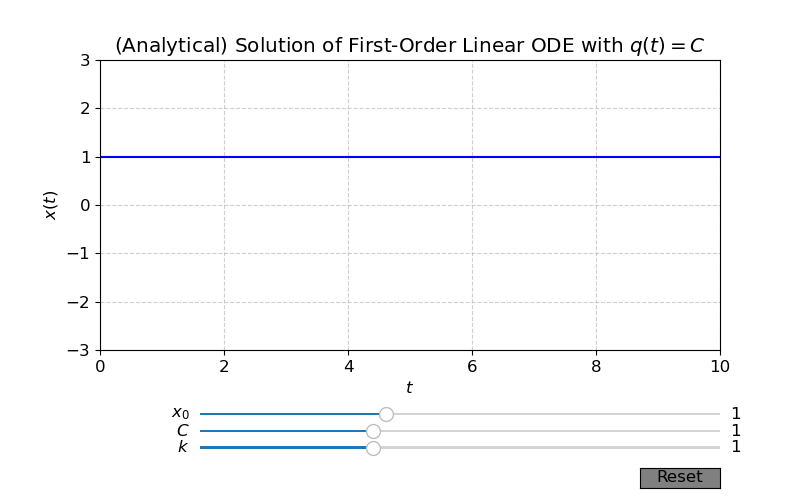

In [175]:
InteractivePlotter(
    np.linspace(0, 10, 100), Solution2,
    [1.0, 1.0, 1.0], [(-1.0, 5.0), (-1.0, 5.0), (-4.0, 10.0)], [0.5, 0.5, 0.5], [r"$k$", r"$C$", r"$x_0$"],
    "blue", [0, 10, -3, 3], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = C$"
)

#### Numerical Solution

In [177]:
x2_ = solve_ivp(Equation2, tlims, [x0], t_eval=t)

In [ ]:
LineNPlotter(
    [
        (t, x2),
        (x2_.t, x2_.y[0])
    ], (8, 5), ["blue", "r-."], ["Analytical", "Numerical"],
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = C$"
)

### Case 3: $p(t) = m t$

The equation is given by
$$ \frac{\mathrm{d}x}{\mathrm{d}t} + k\cdot x = mt $$

The analytical solution for this given the initial condition $x(0) = x_0$ is:
$$ x(t) = \left(x_0 + \frac{m}{k^2}\right) \exp(-kt)  + \frac{m}{k}(t - 1)$$

In [183]:
k = 1.0; m = 1.0
def q3(t): return Constant(t, k)
def p3(t): return Linear(t, m)

# the derivative
def Equation3(t, x):
    return FirstODEGeneralEqn(x, t, q3, p3)

# the analytical solution
def Solution3(t, k, m, x0):
    return np.exp(-k*t)*(x0 + m/(k**2)) + (m/k)*(t-1)

In [186]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 100
t = np.linspace(*tlims, Nt)
x0 = 2.0
x3 = Solution3(t, k, m, x0)

In [ ]:
Line1Plotter(
    t, x3, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = mt$"
)

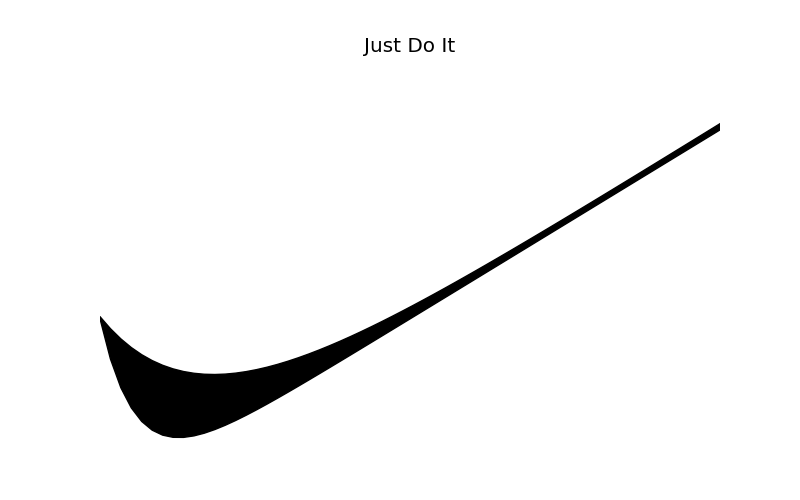

In [235]:
# JUST DO IT
x3_ = Solution3(t, k*2.8, m*2.75, x0*1.3)
plt.close("all")
fig, ax = plt.subplots(figsize=(8, 5))
ax.fill_between(t, x3, x3_, color="black")

ax.set_title(
    r"Just Do It"
)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

In [ ]:
InteractivePlotter(
    np.linspace(0, 10, 100), Solution3,
    [1.0, 1.0, 1.0], [(-1.0, 5.0), (-1.0, 5.0), (-4.0, 10.0)], [0.5, 0.5, 0.5], [r"$k$", r"$m$", r"$x_0$"],
    "blue", [0, 10, 0, 6], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = mt$"
)

#### Numerical Solution

In [227]:
x3_ = solve_ivp(Equation3, tlims, [x0], t_eval=t)

In [ ]:
LineNPlotter(
    [
        (t, x3),
        (x3_.t, x3_.y[0])
    ], (8, 5), ["blue", "r-."], ["Analytical", "Numerical"],
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = mt$"
)

### Case 4: $p(t) = A \sin(\omega t)$

The equation is given by
$$ \frac{\mathrm{d}x}{\mathrm{d}t} + k\cdot x = A \sin(\omega t)$$

The analytical solution for this given the initial condition $x(0) = x_0$ is:
$$ x(t) = \left(x_0 + \frac{A \omega}{k^2 + \omega^2}\right) \exp(-kt)  + \frac{A}{k^2 + \omega^2}(k \sin(\omega t) - \omega \cos(\omega t))$$

In [258]:
k = 0.5; A = 0.5; omega = 2.0
def q4(t): return Constant(t, k)
def p4(t): return Sinusoid(t, A, omega)

# the derivative
def Equation4(t, x):
    return FirstODEGeneralEqn(x, t, q4, p4)

# the analytical solution
def Solution4(t, k, A, omega, x0):
    return np.exp(-k*t)*(x0 + (A*omega)/(k**2 + omega**2)) + \
        (A/(k**2 + omega**2))*(k*np.sin(omega*t)-omega*np.cos(omega*t))

In [259]:
# Calculating analytical solution
tlims = (0, 20)
Nt = 100
t = np.linspace(*tlims, Nt)
x0 = 2.0
x4 = Solution4(t, k, A, omega, x0)

In [ ]:
Line1Plotter(
    t, x4, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = A \sin(\omega t)$"
)

In [ ]:
InteractivePlotter(
    np.linspace(0, 20, 200), Solution4,
    [0.5, 0.5, 2.0, 2.0], [(-1.0, 5.0), (0.0, 2.0), (0.5, 5.5), (-4.0, 10.0)],
    [0.5, 0.1, 0.5, 0.5], [r"$k$", r"$A$", r"$\omega$", r"$x_0$"],
    "blue", [0, 20, -2, 6], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = A\sin(\omega t)$"
)

#### Numerical Solution

In [265]:
x4_ = solve_ivp(Equation4, tlims, [x0], t_eval=t)

In [ ]:
LineNPlotter(
    [
        (t, x4),
        (x4_.t, x4_.y[0])
    ], (8, 5), ["blue", "r-."], ["Analytical", "Numerical"],
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of First-Order Linear ODE with $q(t) = A\sin(\omega t)$"
)

## (Linear) Second-Order ODE

The general form is given by:
$$ \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + s(t)\cdot\frac{\mathrm{d}x}{\mathrm{d}t} + u(t)\cdot x = w(t) $$

We will be studying the special case of homogenous equation ($w(t) = 0$), with the coefficients constants i.e. $s(t) = S$, $u(t) = U$ for some constants $S$ and $U$. Therefore the equation becomes:

$$ \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + S\frac{\mathrm{d}x}{\mathrm{d}t} + U x = 0 $$

Consider some $x(t) = \exp(\lambda t)$. Plugging this into the equation above gives:

$$ \lambda^2 + S \lambda + U = 0 $$

Solving this quadratic equation for $r$ gives us

$$ \lambda = \frac{-S \pm \sqrt{S^2 -4U}}{2}$$

This gives us the following cases based on the sign of $D = S^2 - 4U$:
1. $D > 0 \implies$ Real and distinct $\lambda$'s: $\lambda_1, \lambda_2 \in \mathbb{R}$
2. $D = 0 \implies$ Real and equal $\lambda$'s: $\lambda_3 \in \mathbb{R}$
4. $D < 0 \implies$ Imaginary and conjugate pair $\lambda$'s: $\lambda_4, \lambda_5 \in \mathbb{C}$ such that $\bar{\lambda}_4 = \lambda_5$

The three cases correspond to three different class of solutions

In [267]:
# s, u, and w are callable functions
def SecondODEGeneralEqn(x, xd, t, s, u, w):
    return -s(t)*xd -u(t) * x + w(t)

### Case 1: $S^2 - 4U > 0$

For an initial condition $(x(0), \dot{x}(0))=(x_0, v_0)$, and $\lambda = \lambda_1, \lambda_2 \in \mathbb{R}$, the analytical solution for this case is given by

$$ x(t) = \left( \frac{v_0 - \lambda_2 x_0}{\lambda_1 - \lambda_2} \right)\exp(\lambda_1 t) + \left( \frac{\lambda_1 x_0 - v_0}{\lambda_1 - \lambda_2} \right)\exp(\lambda_2 t)$$

In [305]:
S = 3.0; U = 1.0; W = 0.0
l1, l2 = (-S + np.sqrt(S**2 - 4*U))/2, (-S - np.sqrt(S**2 - 4*U))/2

print(f"l1={l1}, l2={l2}")

def s1(t): return Constant(t, S)
def u1(t): return Constant(t, U)
def w1(t): return Constant(t, W)

# the derivative

def SEquation1(t, X):
    return SecondODEGeneralEqn(X[0], X[1], t, s1, u1, w1)

# the analytical solution
def SSolution1(t, l1, l2, x0, v0):
    return np.exp(l1*t)*((v0 - l2*x0)/(l1 - l2)) + \
        np.exp(l2*t)*((l1*x0 - v0)/(l1 - l2))

def SSolution1_(t, S, U, x0, v0):
    l1, l2 = (-S + np.sqrt(S**2 - 4*U))/2, (-S - np.sqrt(S**2 - 4*U))/2
    return np.exp(l1*t)*((v0 - l2*x0)/(l1 - l2)) + \
        np.exp(l2*t)*((l1*x0 - v0)/(l1 - l2))

l1=-0.3819660112501051, l2=-2.618033988749895


In [308]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 100
t = np.linspace(*tlims, Nt)
x0 = 2.0; v0 = 1.0
x5 = SSolution1_(t, S, U, x0, v0)

In [ ]:
# Concise plotting
Line1Plotter(
    t, x5, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D > 0$"
)

In [ ]:
InteractivePlotter(
    np.linspace(0, 10, 100), SSolution1,
    [l1, l2, 1.0, 1.0], #l1, l2, x0, v0
    [(-2.0, 2.0), (-3.0, 2.0), (-2.0, 5.0), (-2.0, 5.0)],
    [0.2, 0.2, 0.5, 0.5],
    [r"$\lambda_1$", r"$\lambda_2$", r"$x_0$", r"$v_0$"],
    "blue", [0, 10, -1, 5], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D > 0$"
)

### Case 1: $S^2 - 4U = 0$

For an initial condition $(x(0), \dot{x}(0))=(x_0, v_0)$, and $\lambda = \lambda_3 \in \mathbb{R}$, the analytical solution for this case is given by

$$ x(t) = x_0 \exp(\lambda_3 t) + (v_0 - \lambda_3 x_0) t \exp(\lambda_3 t)$$

In [326]:
S = 4.0; U = 4.0; W = 0.0
l1, l2 = (-S + np.sqrt(S**2 - 4*U))/2, (-S - np.sqrt(S**2 - 4*U))/2
if l1 == l2:
    l3 = l1

print(f"l1={l1}, l2={l2}")

def s2(t): return Constant(t, S)
def u2(t): return Constant(t, U)
def w2(t): return Constant(t, W)

# the derivative

def SEquation2(t, X):
    return SecondODEGeneralEqn(X[0], X[1], t, s2, u2, w2)

# the analytical solution
def SSolution2(t, l3, x0, v0):
    return np.exp(l3*t)*x0 + (v0 - l3*x0)*t*np.exp(l3*t)

def SSolution2_(t, S, U, x0, v0):
    l3 = -S/2
    return np.exp(l3*t)*x0 + (v0 - l3*x0)*t*np.exp(l3*t)

l1=-2.0, l2=-2.0


In [333]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 400
t = np.linspace(*tlims, Nt)
x0 = 2.0; v0 = 1.0
x6 = SSolution2_(t, S, U, x0, v0)

In [ ]:
Line1Plotter(
    t, x6, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D = 0$"
)

In [ ]:
InteractivePlotter(
    np.linspace(0, 10, 100), SSolution2,
    [l3, 1.0, 1.0], #l1, l2, x0, v0
    [(-3.0, 2.0), (-2.0, 5.0), (-2.0, 5.0)],
    [0.2, 0.5, 0.5],
    [r"$\lambda_3$", r"$x_0$", r"$v_0$"],
    "blue", [0, 10, -1, 5], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D = 0$"
)

### Case 1: $S^2 - 4U < 0$

For an initial condition $(x(0), \dot{x}(0))=(x_0, v_0)$, and $\lambda = \lambda_4, \lambda_5 \in \mathbb{C}$, the analytical solution for this case is given by

$$ x(t) = \exp(R t) \left( x_0 \cos(I t) + \left[\frac{v_0 - R x_0}{I}\right] \sin(I t) \right) $$
where $R = \mathrm{Re}[\lambda]$ and $I = \mathrm{Im}[\lambda]$

In [338]:
S = 2.0
U = 4.0
W = 0.0
l4, l5 = (-S + np.sqrt(complex(S**2 - 4*U)))/2, (-S - np.sqrt(complex(S**2 - 4*U)))/2
if l4 == np.conjugate(l5):
    R = l4.real
    I = l4.imag

print(f"l4={l4}, l5={l5}")

def s3(t): return Constant(t, S)
def u3(t): return Constant(t, U)
def w3(t): return Constant(t, W)

# the derivative
def SEquation3(t, X):
    return SecondODEGeneralEqn(X[0], X[1], t, s3, u3, w3)

# the analytical solution
def SSolution3(t, l4, l5, x0, v0):
    R, I = l4.real, l4.imag
    return np.exp(R*t)*(x0*np.cos(I*t) + ((v0-R*x0)/I)*np.sin(I*t))
def SSolution3_(t, R, I, x0, v0):
    return np.exp(R*t)*(x0*np.cos(I*t) + ((v0-R*x0)/I)*np.sin(I*t))

l4=(-1+1.7320508075688772j), l5=(-1-1.7320508075688772j)


In [336]:
# Calculating analytical solution
tlims = (0, 10)
Nt = 400
t = np.linspace(*tlims, Nt)
x0 = 2.0
v0 = 1.0
x7 = SSolution3(t, l4, l5, x0, v0)

In [ ]:
Line1Plotter(
    t, x7, (8, 5), "b-",
    r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D < 0$"
)

In [ ]:
InteractivePlotter(
    np.linspace(0, 10, 100), SSolution3_,
    [R, I, 1.0, 1.0],  # l1, l2, x0, v0
    [(-3.0, 2.0), (-3.0, 2.0), (-2.0, 5.0), (-2.0, 5.0)],
    [0.2, 0.2, 0.5, 0.5],
    [r"$\mathrm{Re}[\lambda]$", r"$\mathrm{Im}[\lambda]$", r"$x_0$", r"$v_0$"],
    "blue", [0, 10, -3, 5], (8, 5), r"$t$", r"$x(t)$",
    r"(Analytical) Solution of Second-Order Linear ODE with $D < 0$"
)